# Kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp "/content/drive/My Drive/Kaggle/kaggle.json" ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
!kaggle datasets download -d asdasdasasdas/garbage-classification

 91% 75.0M/82.0M [00:00<00:00, 79.6MB/s]
100% 82.0M/82.0M [00:00<00:00, 98.3MB/s]


In [ ]:
!unzip -q garbage-classification.zip -d .

In [ ]:
!ls 'garbage classification'

'Garbage classification'


# The Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import tensorflow as tf
from 

import glob, os, random

In [ ]:
base_path = './garbage classification/Garbage classification'

img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(len(img_list))

2527


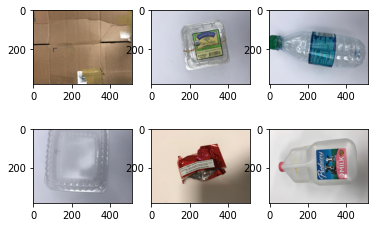

In [ ]:
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 2527 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(300, 300, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 32)       

In [ ]:
pog = model.fit(train_generator, epochs=75, steps_per_epoch=15, validation_data = validation_generator, verbose = 1, validation_steps=5)
model.save("model.h5")
!cp "./model.h5" "/content/drive/My Drive/Kaggle/"

Epoch 1/75
15/15 [==============================] - 40s 3s/step - loss: 1.7540 - acc: 0.1875 - val_loss: 1.7231 - val_acc: 0.2500
Epoch 2/75
15/15 [==============================] - 40s 3s/step - loss: 1.6824 - acc: 0.2552 - val_loss: 1.6979 - val_acc: 0.3375
Epoch 3/75
15/15 [==============================] - 43s 3s/step - loss: 1.6010 - acc: 0.3542 - val_loss: 1.4859 - val_acc: 0.3750
Epoch 4/75
15/15 [==============================] - 40s 3s/step - loss: 1.6026 - acc: 0.2958 - val_loss: 1.5465 - val_acc: 0.3250
Epoch 5/75
15/15 [==============================] - 40s 3s/step - loss: 1.5700 - acc: 0.3625 - val_loss: 1.5437 - val_acc: 0.2875
Epoch 6/75
15/15 [==============================] - 40s 3s/step - loss: 1.5604 - acc: 0.3542 - val_loss: 1.6034 - val_acc: 0.2875
Epoch 7/75
15/15 [==============================] - 40s 3s/step - loss: 1.5620 - acc: 0.3667 - val_loss: 1.4859 - val_acc: 0.4125
Epoch 8/75
15/15 [==============================] - 39s 3s/step - loss: 1.5017 - acc: 0.30